In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm # OLS module for linear regression
from ising import *
from graph_utils import *

## Ising on Barabasi - Albert Networks

In [24]:
## DO NOT redefine the graph! ##
num_nodes = 400
m = 10
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)
G = nx.barabasi_albert_graph(num_nodes, m)
a = get_dense_adj_matrix(G)

29.957322735539908


## Investigation of the relaxation process at fixed temperature

Preliminary step necessary to undersand how many equilibration steps are needed

In [ ]:
frac_temp = [0.4]
#frac_temp = [0.2, 0.4, 0.6, 0.8, 1.2, 1.4]
trial_temps = [f * mean_field_temperature for f in frac_temp]
n_step = 3000
for chosen_temp in trial_temps:
    initial_state, final_state, df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= n_step)
    df.to_csv(f"outputs_csv/BA_results_num_nodes_{num_nodes}_temp_{chosen_temp:.2f}_steps_{n_step}.csv")

In [ ]:
# Single Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
temp = 1.50
frac = temp / mean_field_temperature
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize = (7, 3))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)
df = pd.read_csv("BA_results_num_nodes_400_temp_1.50.csv")
ax1.plot(df['n_step'], np.abs(df['average_magnetization']))
ax1.set_xlabel("time step")
ax1.set_ylabel("abs(magnetization)")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

In [ ]:
#Aggregated Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)

plot_frac = np.array([0.4, 0.6, 0.8])
plot_temp = plot_frac * mean_field_temperature
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols= 2, figsize = (7,9))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)

temp = 0.3
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_0.30.csv")
ax1.plot(df['n_step'], df['average_magnetization'])

x_start = 5000
x_end = 10000
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax1.axhline( y = mean, c = 'black')
ax1.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax1.set_xlabel("time step")
ax1.set_ylabel("magnetization")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])


temp = 1.2
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.20.csv")
ax3.plot(df['n_step'], df['average_magnetization'])
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax3.axhline( y = mean, c = 'black')
ax3.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)
ax3.set_xlabel("time step")
ax3.set_ylabel("magnetization")
ax3.grid()

ax4.plot(df['n_step'], df['energy'])
ax4.set_xlabel("time step")
ax4.set_ylabel(r"energy E")
ax4.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax4.legend(handles=[invisible_line], labels=[invisible_line.get_label()])



temp = 1.8
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.80.csv")
ax5.plot(df['n_step'], df['average_magnetization'])

mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax5.axhline( y = mean, c = 'black')
ax5.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax5.set_xlabel("time step")
ax5.set_ylabel("magnetization")
ax5.grid()
ax6.plot(df['n_step'], df['energy'])
ax6.set_xlabel("time step")
ax6.set_ylabel(r"energy E")
ax6.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax6.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

plt.savefig(f"figures/BA_relaxation_{num_nodes}_steps_{len(df)}.pdf")

## Determination of the Critical Temperature
three methods can be used, and can be compared to improve the accuracy of the estimation:

- magnetization threshold
- curve fitting of the heat and susceptibility peaks
- calculation of the inflection point in energy function

In [25]:
T_i = 0.3 * mean_field_temperature
T_f = 1.1 * mean_field_temperature
t_points = 50
eq_steps = 1500
sw_steps = 700
simulate_ising(a,
                T_i,
                T_f,
                t_points=t_points,
                equilibration_steps=eq_steps,
                sweep_steps=sw_steps,
                filename= f"outputs_csv/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_{sw_steps}_m_{m}_ti_{T_i}_tf_{T_f}.csv")

sparsified matrix
temperature 8.987196820661971, point 1/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 9.965395114067356, point 3/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 10.943593407472742, point 5/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 11.921791700878126, point 7/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 12.89998999428351, point 9/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_

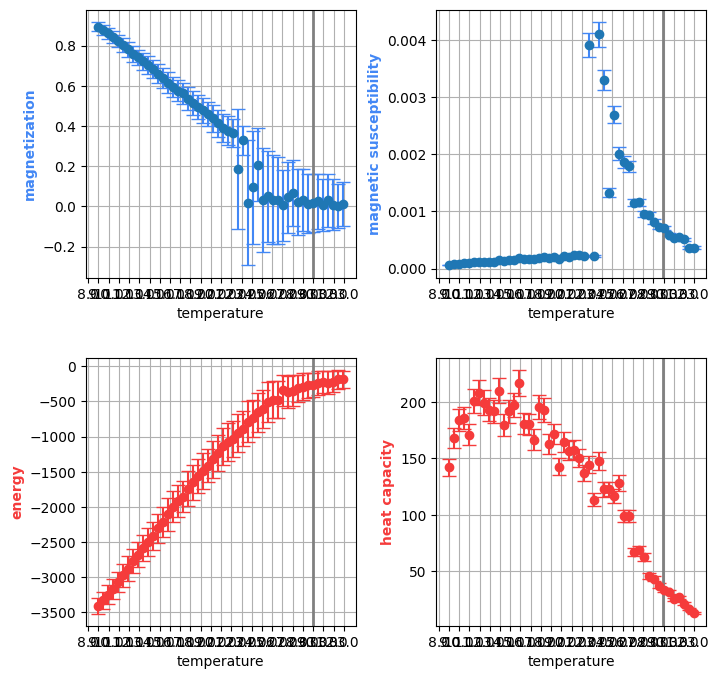

In [27]:
#t_points = 100
#sw_steps = 5000
df = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv")
#df.to_csv(f"outputs_csv/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_{sw_steps}_m_{m}.csv")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
tick_labels = np.arange(np.floor((np.min(df['temperature']))), np.floor(np.max(df['temperature'])) + 2)
formatted_tick_labels = [f"{label:.1f}" for label in tick_labels]


ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(tick_labels)
ax1.set_xticklabels(formatted_tick_labels, fontsize=10)

ax1.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()

ax2.errorbar(df['temperature'], df['susceptibility'], yerr = df['std_susceptibility'], fmt='o', ecolor=my_blue, capsize=5)
ax2.set_xlabel("temperature")
ax2.set_xticks(tick_labels)
ax2.set_xticklabels(formatted_tick_labels, fontsize=10)
ax2.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax2.set_ylabel("magnetic susceptibility", color = my_blue, fontweight='bold')
ax2.grid()

ax3.errorbar(df['temperature'], df['energy'], yerr = df['std_energy'], fmt='o', color = my_red, ecolor=my_red, capsize=5)
ax3.set_xlabel("temperature")
ax3.set_xticks(tick_labels)
ax3.set_xticklabels(formatted_tick_labels, fontsize=10)
ax3.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax3.set_ylabel("energy", color = my_red, fontweight='bold')
ax3.grid()

ax4.errorbar(df['temperature'], df['heat'], yerr = df['std_heat'], fmt='o', color = my_red, ecolor= my_red, capsize=5)
ax4.set_xlabel("temperature")
ax4.set_xticks(tick_labels)
ax4.set_xticklabels(formatted_tick_labels, fontsize=10)
ax4.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax4.set_ylabel("heat capacity", color = my_red, fontweight='bold')
ax4.grid()
#plt.savefig(f"figures/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_{sw_steps}_m_{m}.pdf")

In [ ]:
"""""
fig, ax1 = plt.subplots()
tick_labels = np.arange(np.floor((np.min(df['temperature']))), np.floor(np.max(df['temperature'])) + 2)
formatted_tick_labels = [f"{label:.1f}" for label in tick_labels]


ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(tick_labels)
ax1.set_xticklabels(formatted_tick_labels, fontsize=10)

ax1.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()
#ax1.set_xlim([1.5, 3])
ax1.set_ylim([-0.2, 0.4])
"""""